In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#Showing directories’ size
import os, shutil

train_dir ='/content/drive/MyDrive/images/train'
validation_dir = '/content/drive/MyDrive/images/val'
test_dir = '/content/drive/MyDrive/images/test'

train_corona_virus_d = '/content/drive/MyDrive/images/train/Corona_Virus_Disease'
train_normal = '/content/drive/MyDrive/images/train/Normal'
train_tuberculosis= '/content/drive/MyDrive/images/train/Tuberculosis'

val_corona_virus_d = '/content/drive/MyDrive/images/val/Corona_Virus_Disease'
val_normal = '/content/drive/MyDrive/images/val/Normal'
val_tuberculosis= '/content/drive/MyDrive/images/val/Tuberculosis'

test_corona_virus_d = '/content/drive/MyDrive/images/test/Corona_Virus_Disease'
test_normal = '/content/drive/MyDrive/images/test/Normal'
test_tuberculosis= '/content/drive/MyDrive/images/test/Tuberculosis'


print('total train corona virus images:', len(os.listdir(train_corona_virus_d)))
print('total train normal images:', len(os.listdir(train_normal)))
print('total train tuberculosis images:', len(os.listdir(train_tuberculosis)))


print('total validation corona virus images:', len(os.listdir(val_corona_virus_d)))
print('total validation normal images:', len(os.listdir(val_normal)))
print('total validation tuberculosis images:', len(os.listdir(val_tuberculosis)))


print('total testing organic corona virus img:', len(os.listdir(test_corona_virus_d)))
print('total testing recicle normal imgs:', len(os.listdir(test_normal)))
print('total testing recicle tuberculosis img:', len(os.listdir(test_tuberculosis)))

total train corona virus images: 1218
total train normal images: 1207
total train tuberculosis images: 1220
total validation corona virus images: 406
total validation normal images: 402
total validation tuberculosis images: 406
total testing organic corona virus img: 407
total testing recicle normal imgs: 404
total testing recicle tuberculosis img: 408


In [64]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 150

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

Found 3645 files belonging to 3 classes.
Found 1214 files belonging to 3 classes.
Found 1219 files belonging to 3 classes.


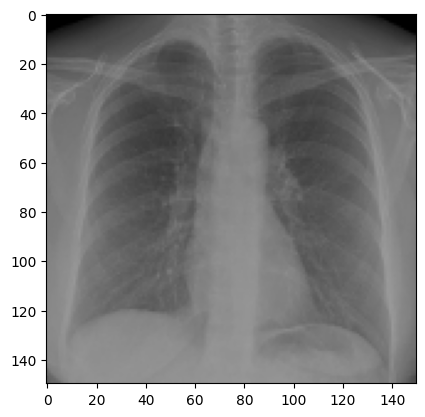

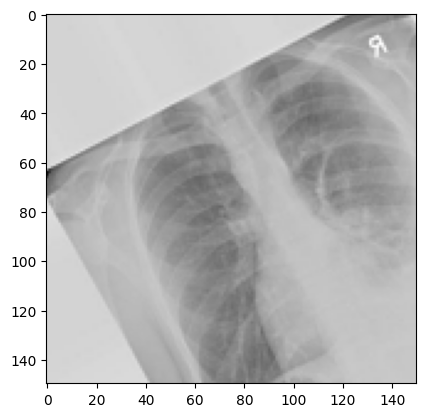

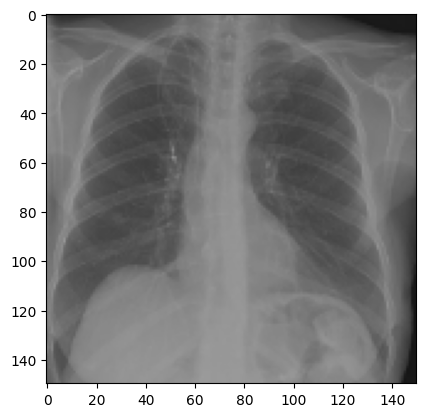

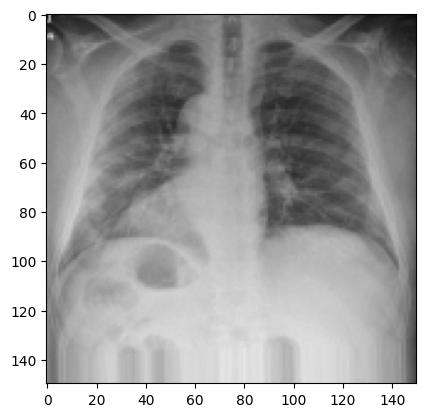

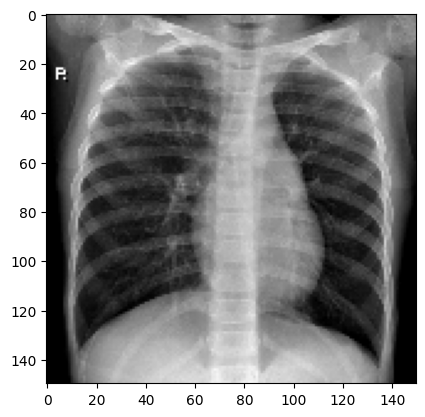

In [47]:
#Viewing the first 5 images of the first batch
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [65]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
# x = layers.Conv2D(filters=32, kernel_size=12, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=32, kernel_size=7, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=5, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)

outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 144, 144, 32)      4736      
                                                                 
 batch_normalization_25 (Ba  (None, 144, 144, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 72, 72, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 68, 68, 64)        5126

In [66]:
import tensorflow as tf
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-7),
    metrics=['acc'])

In [67]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True,monitor='val_loss')
]

In [68]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/10
114/114 [==============================] - 64s 447ms/step - loss: 1.1844 - acc: 0.4102 - val_loss: 1.1564 - val_acc: 0.3344
Epoch 2/10
114/114 [==============================] - 52s 428ms/step - loss: 1.1777 - acc: 0.3860 - val_loss: 1.1776 - val_acc: 0.3344
Epoch 3/10
114/114 [==============================] - 60s 506ms/step - loss: 1.1751 - acc: 0.3498 - val_loss: 1.1588 - val_acc: 0.3904
Epoch 4/10
114/114 [==============================] - 51s 428ms/step - loss: 1.1738 - acc: 0.3457 - val_loss: 1.1596 - val_acc: 0.4390
Epoch 5/10
114/114 [==============================] - 59s 503ms/step - loss: 1.1728 - acc: 0.3366 - val_loss: 1.1625 - val_acc: 0.3575
Epoch 6/10
114/114 [==============================] - 50s 421ms/step - loss: 1.1718 - acc: 0.3322 - val_loss: 1.1646 - val_acc: 0.3501
Epoch 7/10
114/114 [==============================] - 50s 425ms/step - loss: 1.1707 - acc: 0.3364 - val_loss: 1.1665 - val_acc: 0.3435
Epoch 8/10
114/114 [==============================] - 6

In [69]:
model.save('./Batch_Norm_MSE_Model_xray.keras')

In [70]:
keras.models.load_model('./Batch_Norm_MSE_Model_xray.keras')

In [71]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

38/38 [==============================] - 12s 256ms/step - loss: 1.1677 - acc: 0.3320
val_acc: 0.3319604694843292


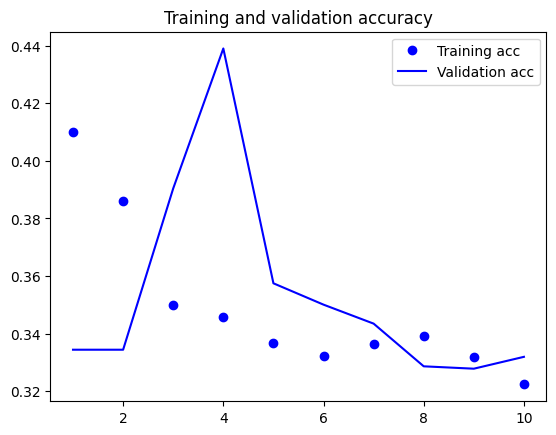

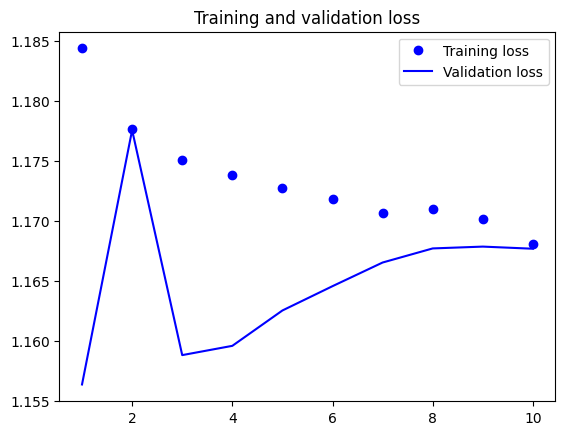

In [72]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [73]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

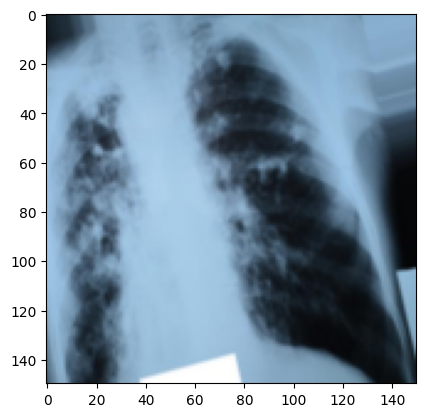

(1, 150, 150, 3)
1/1 [==============================] - 0s 230ms/step
Class index: [2]
One-hot encoded prediction: [[0. 0. 1.]]


In [74]:
# img = tf.keras.preprocessing.image.load_img('./train/cats/cat.1.jpg', target_size=(150, 150), interpolation='bilinear')
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/images/val/Tuberculosis/test_0_274.jpeg', target_size=(150, 150), interpolation='bilinear')
plt.imshow(img)
plt.show()
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)

# Convert prediction to class index (0, 1, 2)
class_index = np.argmax(result, axis=1)

# Convert class index to one-hot encoded vector
one_hot_prediction = to_categorical(class_index, num_classes=3)

# Print the result
print("Class index:", class_index)
print("One-hot encoded prediction:", one_hot_prediction)

1/1 [==============================] - 0s 31ms/step


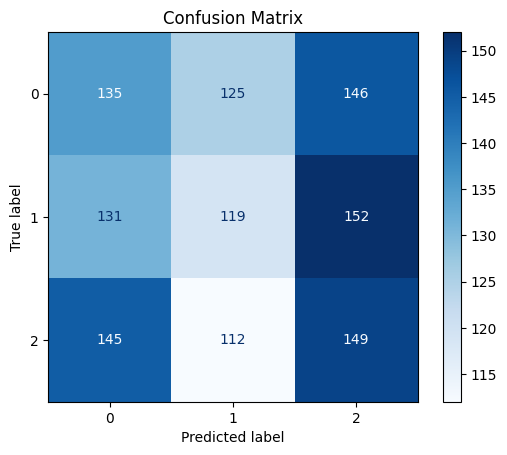

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Inicializar listas para almacenar etiquetas verdaderas y predicciones
true_labels = []
predictions = []

# Iterar a través del conjunto de validación y predecir
for images, labels in validation_dataset:
    preds = model.predict(images)
    predictions.extend(preds)
    true_labels.extend(labels.numpy())

# Convertir las listas a arrays de numpy
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Si las etiquetas verdaderas están en formato one-hot encoded, convertirlas a etiquetas enteras
if true_labels.ndim == 2 and true_labels.shape[1] > 1:
    true_labels_int = np.argmax(true_labels, axis=1)
else:
    true_labels_int = true_labels

# Asegurarse de que las predicciones son probabilidades y luego convertirlas a etiquetas enteras
predictions_int = np.argmax(predictions, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(true_labels_int, predictions_int)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()